<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/language_features/language_critique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>


<h1 style="text-align: center;">Evaluating Critique Language</h1>


**What is Critique Language Evaluation?**: Critique Language Evaluation is a method used to assess the quality and effectiveness of language in a response, focusing on factors such as clarity, coherence, conciseness, and overall communication. It involves analyzing how well the language used in a response conveys the intended message, whether it addresses the question or issue comprehensively, and if it is free from ambiguity or confusion.

For example, if a user asks a language model, "Can you recommend a smartphone with a good camera for photography?" A comprehensive and well-articulated response would not only list a suitable smartphone but also provide additional details such as camera specifications, features, and perhaps considerations for the user's specific photography needs. A critique of the language in this response would assess whether the information is clearly presented, if it directly addresses the user's request, and if it is communicated in a concise and understandable manner. The evaluation would focus on the quality of language use to ensure that the response is not only accurate but also effectively conveys the necessary information to the user.

**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description                     |
| ----------- | ------------------------------- |
| response    | The response given by the model |

 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
good_language_responses = [
    {"response": "The formula for calculating the area of a circle is A = πr^2, where A is the area and r is the radius."},

    {"response": "Certainly. Photosynthesis is the process by which green plants, algae, and some bacteria convert light energy into chemical energy. It involves the absorption of sunlight, carbon dioxide, and water to produce glucose and oxygen."},

    {"response": "The blue color of the sky during the day is due to Rayleigh scattering. Shorter wavelengths of light, such as blue and violet, are scattered more by the Earth's atmosphere, making the sky appear blue."},

    {"response": "To solve a quadratic equation in the form ax^2 + bx + c = 0, you can use the quadratic formula: x = (-b ± √(b^2 - 4ac)) / 2a."},

    {"response": "The Declaration of Independence, adopted on July 4, 1776, declared the thirteen American colonies as independent states and no longer part of the British Empire. It expressed the principles of self-government and individual rights, serving as a foundational document for the United States."},
]

bad_language_responses = [
    {"response": "Uh, yeah, so, like, you gotta use this formula thingy. It's A equals, um, pi times the radius squared. You know, pi, that number thing. And squared means, like, you multiply the radius by itself."},

    {"response": "Photosynthesis, right? So, plants and stuff, they do this thing with sunlight and, uh, carbon dioxide and water. It's like a chemical thing that makes, um, glucose and oxygen, or whatever."},

    {"response": "Oh, the sky being blue? It's, um, because of, like, this scattering thing. The sunlight and colors and, you know, shorter wavelengths and all that. So, blue. Yeah."},

    {"response": "Quadratic equation solving? Yeah, so, you use this formula stuff. It's got letters and numbers and things like minus and plus. Just plug it in and, you know, solve for the variable thing."},

    {"response": "So, the Declaration of Independence. Important, right? It's about, like, colonies and not being with Britain. Talks about self-government and rights. Foundational for the U.S. or something."},
]

data = good_language_responses + bad_language_responses

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-******************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.CRITIQUE_LANGUAGE]
)

2024-01-31 18:31:29.211 | INFO     | uptrain.framework.evalllm:evaluate:104 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res, indent=3))

[
   {
      "response": "The formula for calculating the area of a circle is A = \u03c0r^2, where A is the area and r is the radius.",
      "score_fluency": 1.0,
      "score_coherence": 1.0,
      "score_grammar": 1.0,
      "score_politeness": 1.0,
      "explanation_fluency": "The text is completely fluent and natural sounding.",
      "explanation_coherence": "The text is highly coherent, with clear and logical connections between the elements.",
      "explanation_grammar": "The grammar and word usage are perfect in the text.",
      "explanation_politeness": "The tone of the text is neutral and polite."
   },
   {
      "response": "Certainly. Photosynthesis is the process by which green plants, algae, and some bacteria convert light energy into chemical energy. It involves the absorption of sunlight, carbon dioxide, and water to produce glucose and oxygen.",
      "score_fluency": 1.0,
      "score_coherence": 1.0,
      "score_grammar": 1.0,
      "score_politeness": 1.0,
   

## Step 4: Let's look at some of the results 

### Sample with good language responses

In [5]:
print(json.dumps(res[0],indent=3))

{
   "response": "The formula for calculating the area of a circle is A = \u03c0r^2, where A is the area and r is the radius.",
   "score_fluency": 1.0,
   "score_coherence": 1.0,
   "score_grammar": 1.0,
   "score_politeness": 1.0,
   "explanation_fluency": "The text is completely fluent and natural sounding.",
   "explanation_coherence": "The text is highly coherent, with clear and logical connections between the elements.",
   "explanation_grammar": "The grammar and word usage are perfect in the text.",
   "explanation_politeness": "The tone of the text is neutral and polite."
}


### Sample with good language responses

In [6]:
print(json.dumps(res[5],indent=3))

{
   "response": "Uh, yeah, so, like, you gotta use this formula thingy. It's A equals, um, pi times the radius squared. You know, pi, that number thing. And squared means, like, you multiply the radius by itself.",
   "score_fluency": 0.4,
   "score_coherence": 0.4,
   "score_grammar": 0.6,
   "score_politeness": 0.8,
   "explanation_fluency": "The text is filled with filler words and hesitations, making it sound unnatural and lacking fluency.",
   "explanation_coherence": "The text lacks coherence as it is filled with hesitations and filler words, making it difficult to follow the explanation.",
   "explanation_grammar": "The grammar is informal and conversational, but there are no major grammatical errors.",
   "explanation_politeness": "The tone is polite and conversational."
}


## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [7]:
from uptrain import APIClient, Evals
import json

UPTRAIN_API_KEY = "up-******************"  # Insert your UpTrain key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-language-critique-evals",
    data = data,
    checks = [Evals.CRITIQUE_LANGUAGE]
)

2024-01-31 18:31:37.596 | INFO     | uptrain.framework.remote:log_and_evaluate:511 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [8]:
print(json.dumps(res, indent=3))

[
   {
      "response": "The formula for calculating the area of a circle is A = \u03c0r^2, where A is the area and r is the radius.",
      "score_fluency": 1.0,
      "score_coherence": 1.0,
      "score_grammar": 1.0,
      "score_politeness": 1.0,
      "explanation_fluency": "The text is completely fluent and natural sounding.",
      "explanation_coherence": "The text is highly coherent, with clear and logical connections between the elements.",
      "explanation_grammar": "The grammar and word usage are perfect.",
      "explanation_politeness": "The tone of the text is neutral and polite."
   },
   {
      "response": "Certainly. Photosynthesis is the process by which green plants, algae, and some bacteria convert light energy into chemical energy. It involves the absorption of sunlight, carbon dioxide, and water to produce glucose and oxygen.",
      "score_fluency": 1.0,
      "score_coherence": 1.0,
      "score_grammar": 1.0,
      "score_politeness": 1.0,
      "explanat

### Dashboards: 
Histogram of score vs number of cases with that score

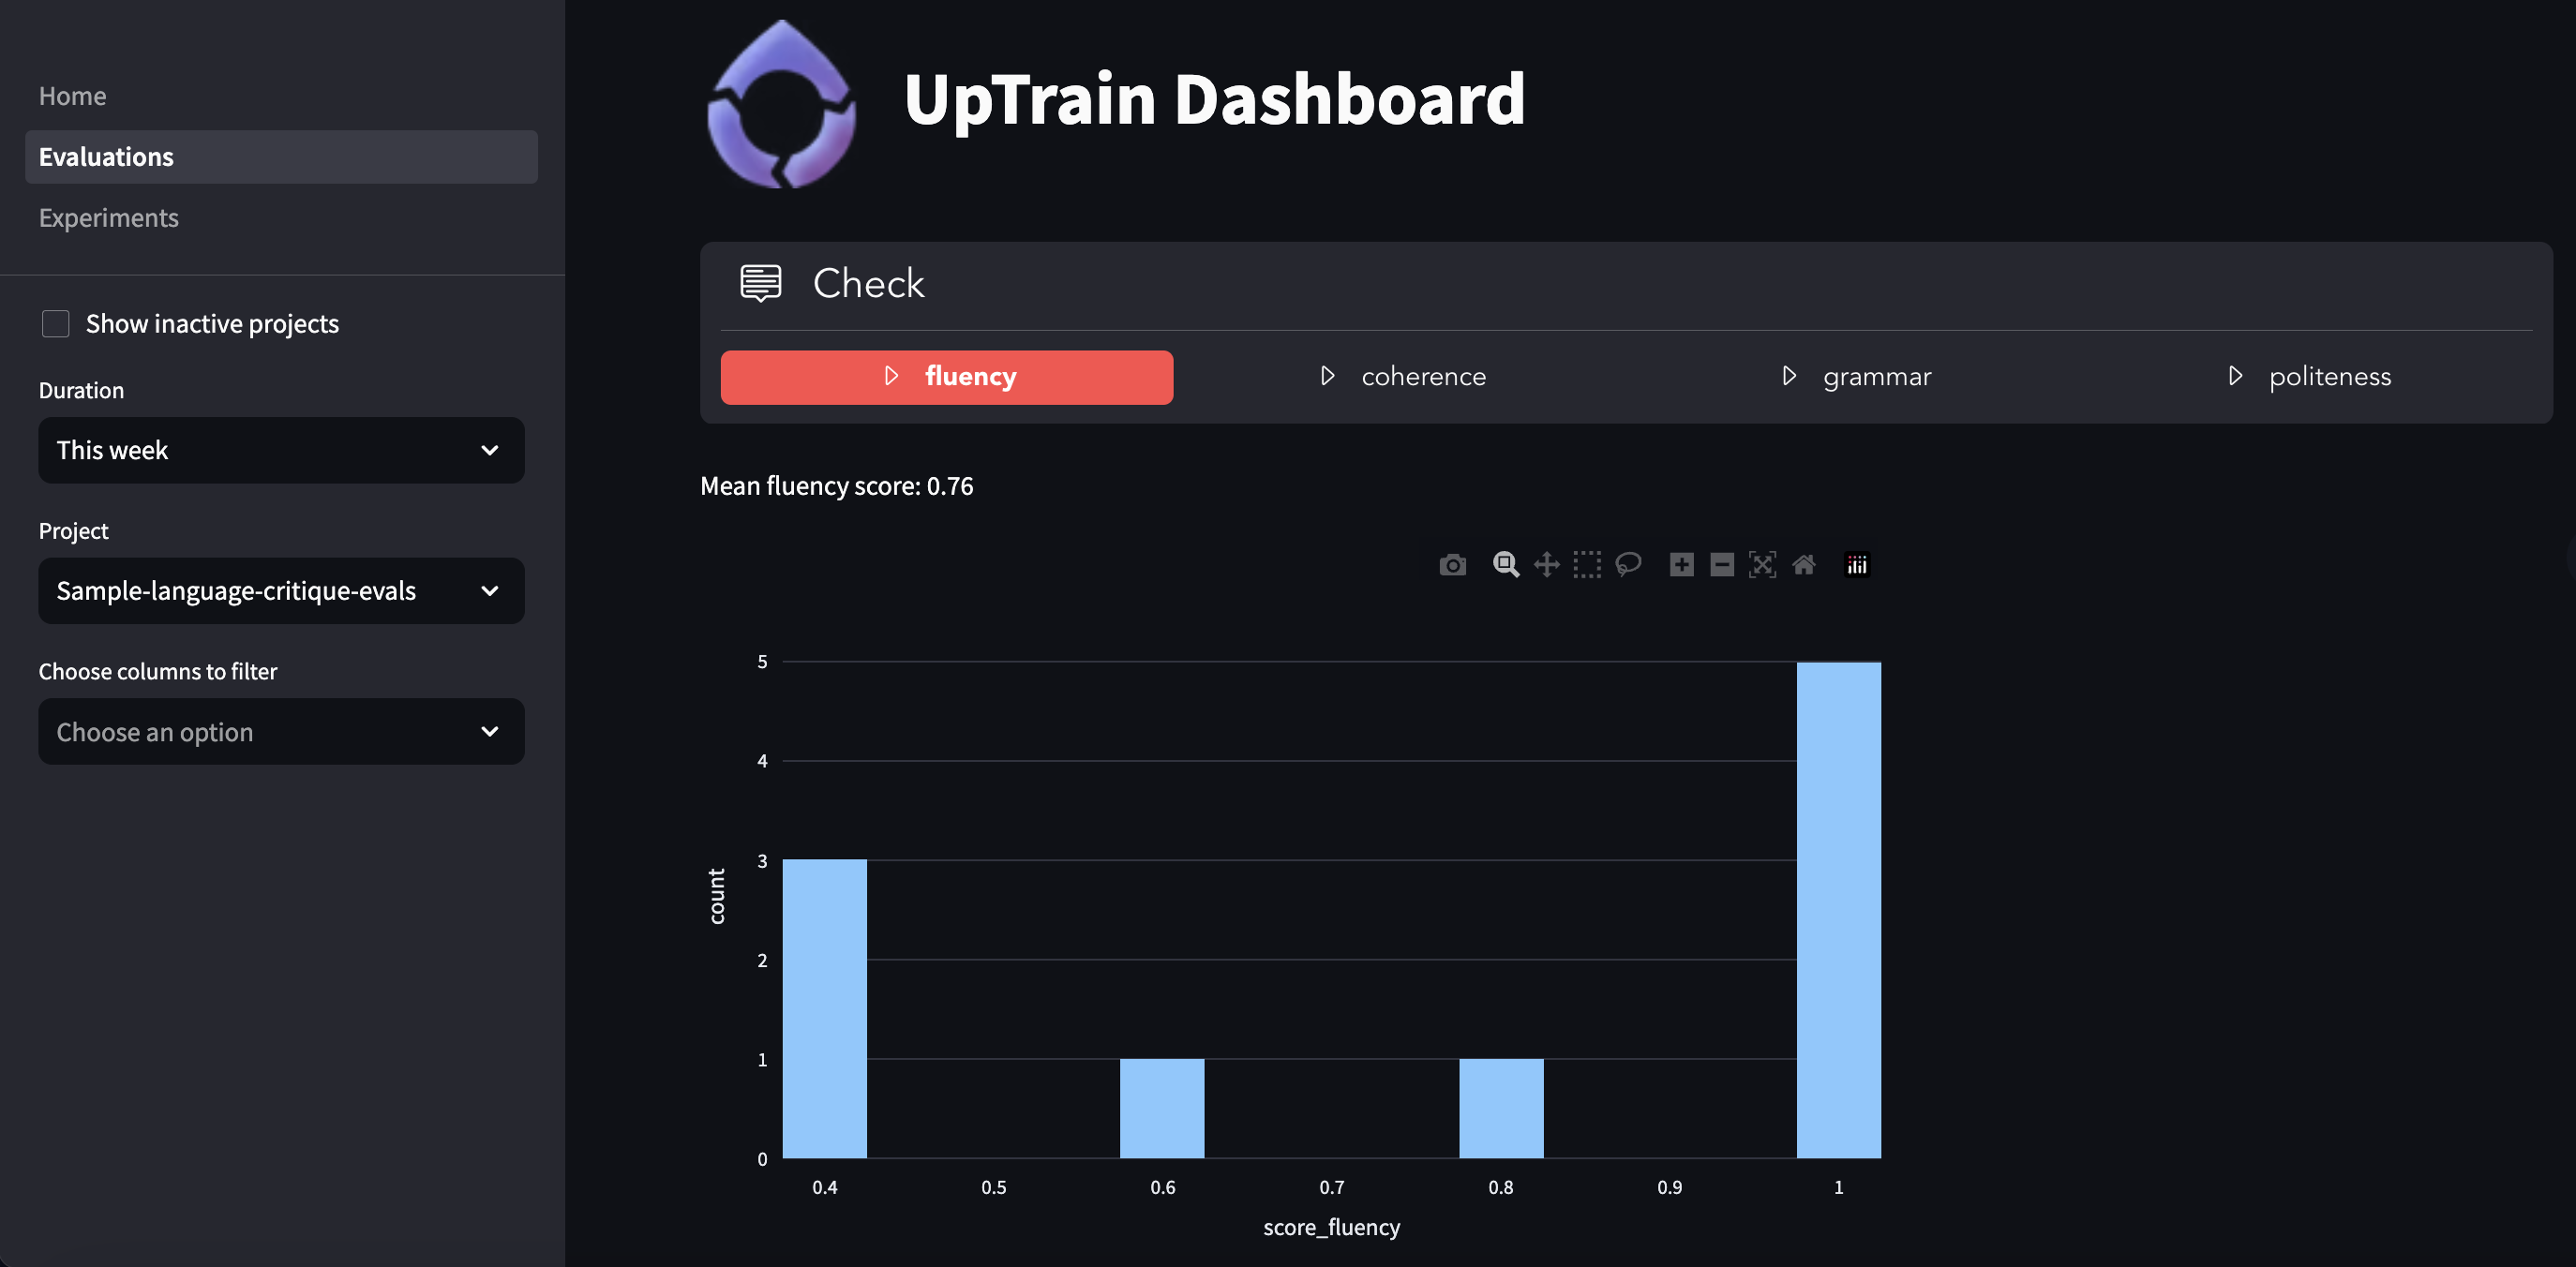

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

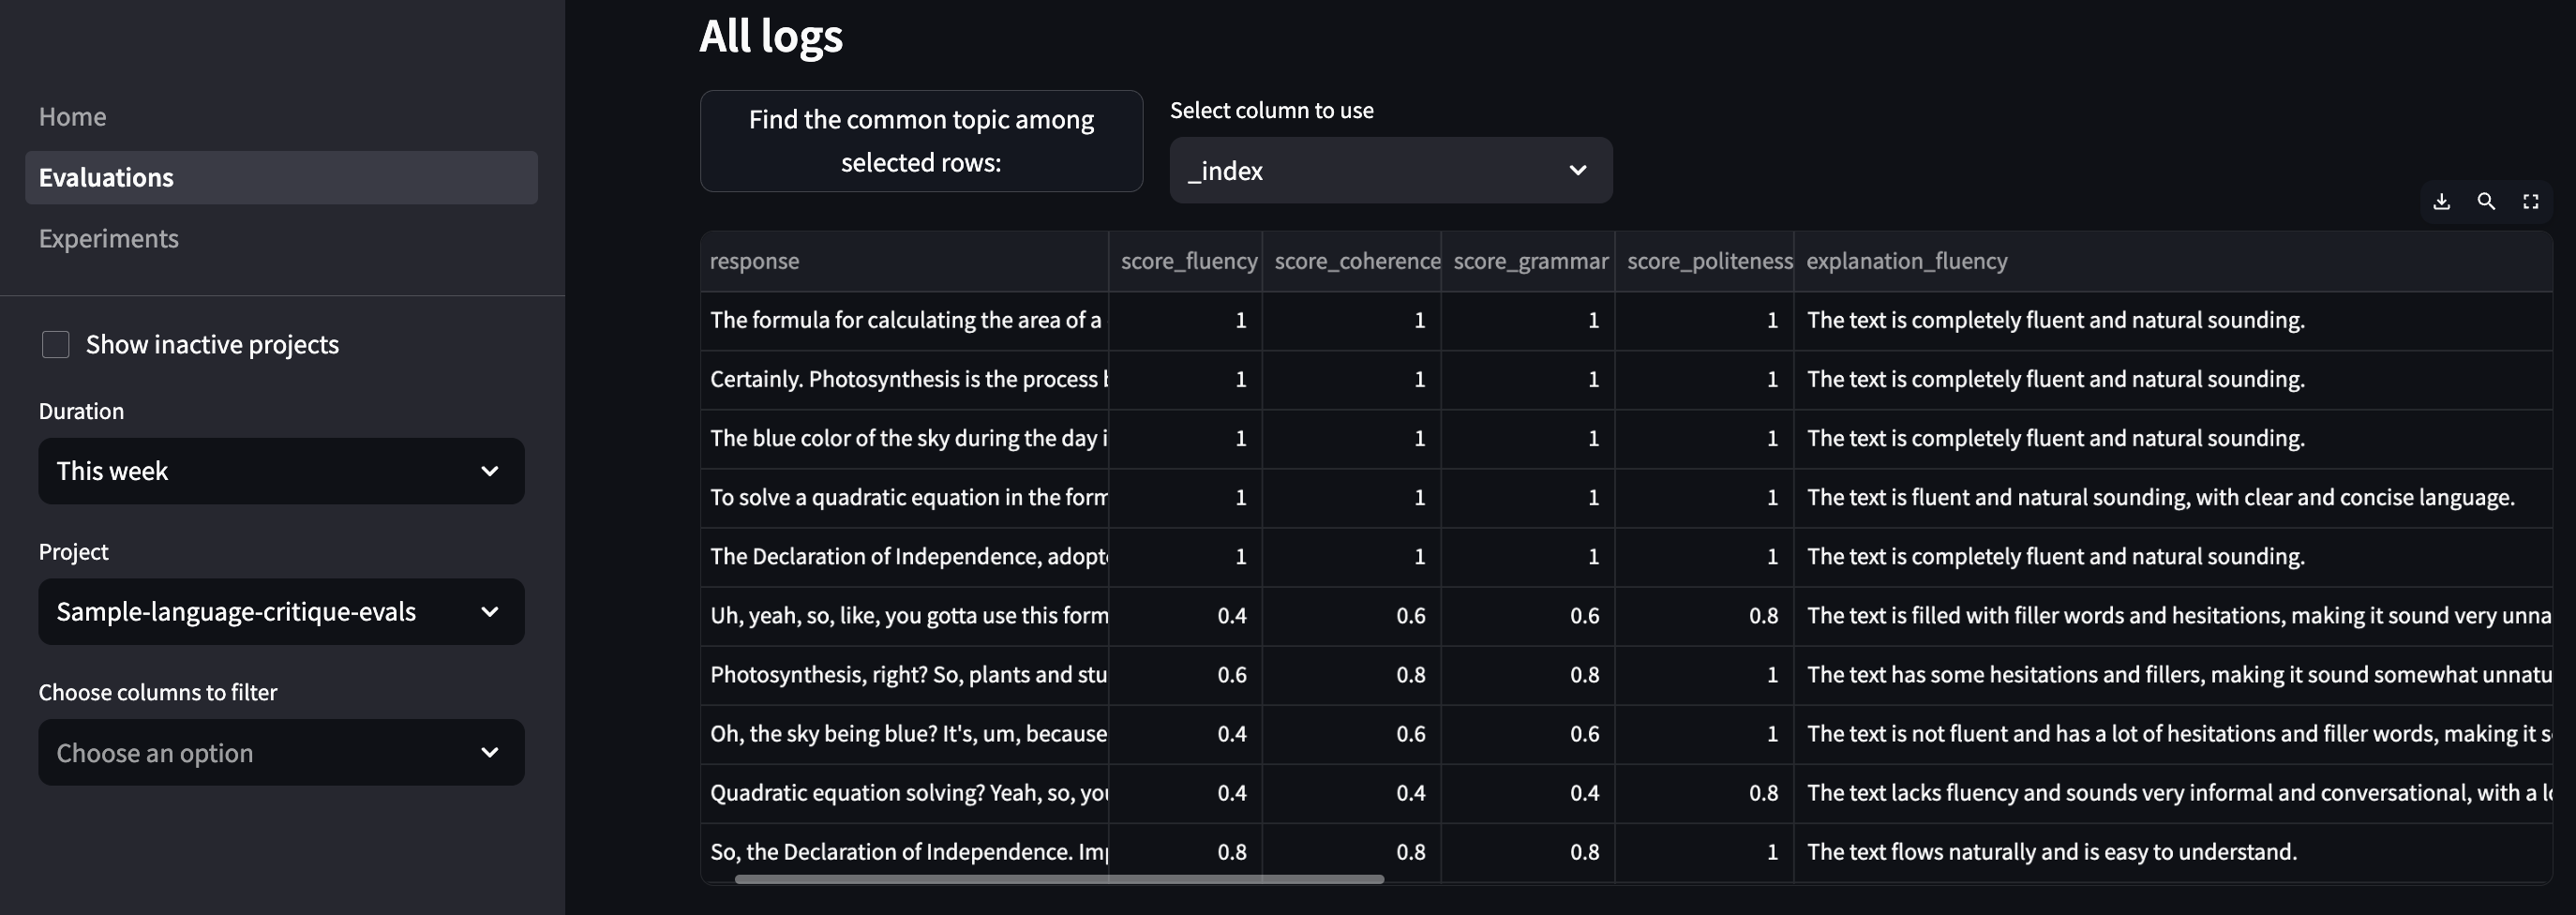